In [1]:
# Импортируем основные модули pytorch
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
# Импортируем модули, связанные с компьютерным зрением
from torchvision import datasets
from torchvision.transforms import ToTensor
# Импортируем вспомогательные модули
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [49]:
# В первой части работы вам предстоит создать и обучить модель на основе полносвязной нейронной сети, аналогичной той,
# что вы уже обучали в первом семестре вручную: сети с одним скрытым слоем и логистической функцией активации.
# В качестве обучающего набора будем использовать уже известный нам набор MNIST.

# Класс полносвязной нейронной сети.
# Необходимо реализовать полносвязную нейронную сеть с одним скрытым слоем
# с логистической функцией активации на скрытом слое и SoftMax на выходном слое.
# Схема сети: Линейный слой -> Логическая функция -> Линейный слой -> SoftMax
# Сеть должна классифицировать черно-белые картинки с цифрами (0-9) размера 28х28 пискселей из набора данных MNIST.
# Подумайте, какую функцию потерь будете использовать при обучении: от этого будет зависеть функция на последнем слое.
# Разберитесь в функциях потерь CrossEntropyLoss, NLLLoss, а также в функцих активации LogSoftmax и Softmax по документации.
# После успешной реализации требуемой сети, попробуйте поиграть с количеством нейронов, слоев, типами функций активации.
# Какой максимальной точности на тестовой выборке удалось достичь?
class FullyConnectedNet(nn.Module):

    def __init__(self):
        super().__init__()
        # ВАШ КОД ЗДЕСЬ
        self.fc1 = nn.Linear(28*28,256)
        self.fc2 = nn.Linear(256, 10)
        self.act1 = nn.Sigmoid()
        self.out = nn.LogSoftmax()

        # ===============

    # Метод для выполнения прямого распространения сигнала, необходимо заполнить
    def forward(self, x):
        # ВАШ КОД ЗДЕСЬ
        x=self.act1(self.fc1(x))
        x=self.out(self.fc2(x))
        # x = self.fc2(x)
        return x
        # ===============

In [50]:
# Задаем количество эпох (проходов по всей обучающей выборке) и размер пакета, можно варьировать
EPOCHS = 10
BATCH_SIZE = 256

# Загружаем данные из набора MNIST
train_data = datasets.MNIST(root='./data/train', train=True, download=True, transform=ToTensor())
test_data = datasets.MNIST(root='./data/test', train=False, download=True, transform=ToTensor())

# DataLoader позволяет разбить выборку на пакеты заданного размера.
# Параметр shuffle отвечает за перемешивание данных в пакете
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

# Если графический ускоритель поддерживает обучение на нем, будем использовать его,
# иначе обучать на процессоре.
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Готовимся к обучению
model = FullyConnectedNet().to(device)  # создаем модель
optimizer = torch.optim.AdamW(model.parameters(),lr=3e-4)  # оптимизатор, нужно выбрать и настроить
loss_function = nn.NLLLoss()# нкция потерь, нужно выбрать
loss_history = list()  # список для хранения истории изменения функции стоимости

In [51]:
# Начинаем обучение
for epoch in range(EPOCHS):
    for i, (batch, labels) in enumerate(train_loader):  # разбиваем выборку на пакеты
        # Нужно реализовать один шаг градиентного спуска
        loss = torch.tensor(0, dtype=torch.float32)  # значение функции стоимости на пакете, нужно рассчитать
        # ВАШ КОД ЗДЕСЬ
        batch = batch.reshape(batch.shape[0], -1).to(device)
        # print(batch)
        # optimizer.zero_grad()
        loss = loss_function(model(batch),labels.to(device))
        loss.backward()
        optimizer.step()
        # ===============
        loss_history.append(loss.log().item())  # добавляется логарифм стоимости для большей наглядности
    print(f'Эпоха {epoch + 1} завершилась с функцией стоимости на последнем пакете = {loss.item()}')

Эпоха 1 завершилась с функцией стоимости на последнем пакете = 0.9267888069152832
Эпоха 2 завершилась с функцией стоимости на последнем пакете = 0.3133796453475952
Эпоха 3 завершилась с функцией стоимости на последнем пакете = 0.18855172395706177
Эпоха 4 завершилась с функцией стоимости на последнем пакете = 0.3413228690624237
Эпоха 5 завершилась с функцией стоимости на последнем пакете = 0.18113960325717926
Эпоха 6 завершилась с функцией стоимости на последнем пакете = 0.2713474929332733
Эпоха 7 завершилась с функцией стоимости на последнем пакете = 0.27305516600608826
Эпоха 8 завершилась с функцией стоимости на последнем пакете = 0.2536620795726776
Эпоха 9 завершилась с функцией стоимости на последнем пакете = 0.1249658539891243
Эпоха 10 завершилась с функцией стоимости на последнем пакете = 0.13028277456760406


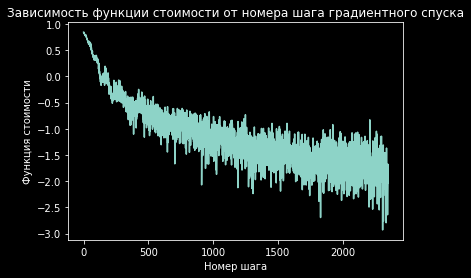

In [52]:
# Выводим график функции стоимости
plt.title('Зависимость функции стоимости от номера шага градиентного спуска')
plt.xlabel('Номер шага')
plt.ylabel('Функция стоимости')
plt.plot(loss_history)
plt.show()

In [53]:
# Отключаем расчет вычислительного графа для экономии времени и памяти: нам не нужно считать градиенты при тестировании модели
with torch.no_grad():
    # Оцениваем качество модели
    train_data_loader = DataLoader(train_data, batch_size=len(train_data))
    train_features, train_targets = next(iter(train_data_loader))

    train_features = train_features.reshape(len(train_data), -1).to(device)
    train_model_predictions = torch.argmax(model(train_features), dim=1)
    print('Точность (accuracy) на обучающей выборке:', accuracy_score(train_data.targets, train_model_predictions.cpu()))

    test_data_loader = DataLoader(test_data, batch_size=len(test_data))
    test_features, test_targets = next(iter(test_data_loader))

    test_features = test_features.reshape(len(test_data), -1).to(device)
    test_model_predictions = torch.argmax(model(test_features), dim=1)
    print('Точность (accuracy) на тестовой выборке:', accuracy_score(test_data.targets, test_model_predictions.cpu()))

Точность (accuracy) на обучающей выборке: 0.9534666666666667
Точность (accuracy) на тестовой выборке: 0.9459


In [8]:
# Импортируем основные модули pytorch
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

# Импортируем модули, связанные с компьютерным зрением
from torchvision import datasets
from torchvision.transforms import ToTensor

# Импортируем вспомогательные модули
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [14]:
# Во второй части вам необходимо воспроизвести в PyTorch сверточную сеть LeNet и также обучить ее на наборе MNIST.

# Класс сети LeNet.
# Нужно реализовать сеть с архитектурой, описанной на изображении lenet.png.
class LeNet(nn.Module):

    def __init__(self):
        super().__init__()

        # ВАШ КОД ЗДЕСЬ
        self.con1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2)
        self.act = nn.Tanh()
        self.pool = nn.AvgPool2d(kernel_size=2, stride=2, padding=0)
        self.con2 = nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0)
        self.con3 = nn.Conv2d(16, 120, kernel_size=5, stride=1, padding=0)

        self.fc1 = nn.Linear(120, 84)
        self.fc2 = nn.Linear(84, 10)
        self.out = nn.Softmax()
        
        # ===============

    def forward(self, x):
        # ВАШ КОД ЗДЕСЬ
        x = self.pool(self.act(self.con1(x)))
        x = self.pool(self.act(self.con2(x)))
        x = self.act(self.con3(x))

        x = x.view(x.size(0), -1)

        x = self.fc2(self.act(self.fc1(x)))
        x = self.out(x)
        return x
        # ===============

In [15]:
# Задаем количество эпох (проходов по всей обучающей выборке) и размер пакета, можно варьировать
EPOCHS = 10
BATCH_SIZE = 256

# Загружаем данные из набора MNIST
train_data = datasets.MNIST(root='./data/train', train=True, download=True, transform=ToTensor())
test_data = datasets.MNIST(root='./data/test', train=False, download=True, transform=ToTensor())

# DataLoader позволяет разбить выборку на пакеты заданного размера.
# Параметр shuffle отвечает за перемешивание данных в пакете
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

# Если графический ускоритель поддерживает обучение на нем, будем использовать его,
# иначе обучать на процессоре.
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Готовимся к обучению
model = LeNet().to(device)  # создаем модель
optimizer = torch.optim.AdamW(model.parameters(), lr = 3e-4)  # оптимизатор, нужно выбрать и настроить
loss_function = nn.CrossEntropyLoss()  # функция потерь, нужно выбрать
loss_history = list()  # список для хранения истории изменения функции стоимости

In [16]:
# Начинаем обучение
for epoch in range(EPOCHS):
    for i, (batch, labels) in enumerate(train_loader):  # разбиваем выборку на пакеты
        # Нужно реализовать один шаг градиентного спуска
        loss = torch.tensor(0, dtype=torch.float32)  # значение функции стоимости на пакете, нужно рассчитать
        # ВАШ КОД ЗДЕСЬ
        # batch = batch.reshape(batch.shape[0], -1).to(device)
        optimizer.zero_grad()
        loss = loss_function(model(batch), labels.to(device))
        loss.backward()
        optimizer.step()
        # ===============
        loss_history.append(loss.log().item())  # добавляется логарифм стоимости для большей наглядности
    print(f'Эпоха {epoch + 1} завершилась с функцией стоимости на последнем пакете = {loss.item()}')

Эпоха 1 завершилась с функцией стоимости на последнем пакете = 1.6407151222229004
Эпоха 2 завершилась с функцией стоимости на последнем пакете = 1.5736709833145142
Эпоха 3 завершилась с функцией стоимости на последнем пакете = 1.5086983442306519
Эпоха 4 завершилась с функцией стоимости на последнем пакете = 1.5237752199172974
Эпоха 5 завершилась с функцией стоимости на последнем пакете = 1.513898491859436
Эпоха 6 завершилась с функцией стоимости на последнем пакете = 1.507928490638733
Эпоха 7 завершилась с функцией стоимости на последнем пакете = 1.4942435026168823
Эпоха 8 завершилась с функцией стоимости на последнем пакете = 1.482675552368164
Эпоха 9 завершилась с функцией стоимости на последнем пакете = 1.476833462715149
Эпоха 10 завершилась с функцией стоимости на последнем пакете = 1.4792059659957886


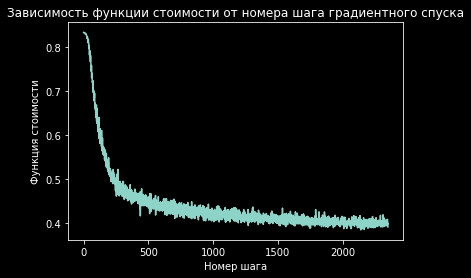

In [17]:
# Выводим график функции стоимости
plt.title('Зависимость функции стоимости от номера шага градиентного спуска')
plt.xlabel('Номер шага')
plt.ylabel('Функция стоимости')
plt.plot(loss_history)
plt.show()

In [18]:
# Отключаем расчет вычислительного графа для экономии времени и памяти: нам не нужно считать градиенты при тестировании модели
with torch.no_grad():
    # Оцениваем качество модели
    train_data_loader = DataLoader(train_data, batch_size=len(train_data))
    train_features, train_targets = next(iter(train_data_loader))

    train_features = train_features.to(device)
    train_model_predictions = torch.argmax(model(train_features), dim=1)
    print('Точность (accuracy) на обучающей выборке:', accuracy_score(train_data.targets, train_model_predictions.cpu()))

    test_data_loader = DataLoader(test_data, batch_size=len(test_data))
    test_features, test_targets = next(iter(test_data_loader))

    test_features = test_features.to(device)
    test_model_predictions = torch.argmax(model(test_features), dim=1)
    print('Точность (accuracy) на тестовой выборке:', accuracy_score(test_data.targets, test_model_predictions.cpu()))

Точность (accuracy) на обучающей выборке: 0.9765833333333334
Точность (accuracy) на тестовой выборке: 0.9739
